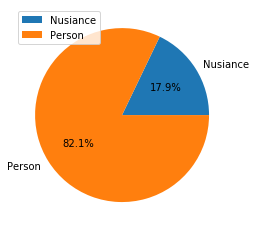

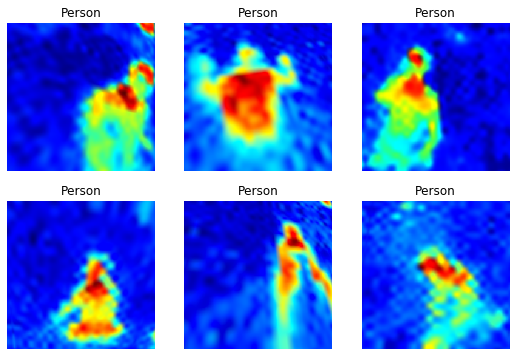

In [20]:
# import fastai library
from fastai.vision.all import *
from collections import Counter
import glob 
import matplotlib.pyplot as plt

# Load the data path to images
path = os.getcwd()
thermal_path = os.path.join(path , 'img/thermal/')

# initalise list to store the total number of each class
distribution = []

for i in glob.glob(thermal_path+"/*"):
    if i.split('/')[-1].split('_')[1] == 'nusiance':
        distribution.append('Nusiance')
    else:
        distribution.append('Person')
c = dict(Counter(distribution))
# plot a pie chart of our distribution
plt.pie(c.values(),labels=c.keys(),autopct='%1.1f%%')
plt.legend()
plt.show()

# Define the function to return the label
def is_person(x):
    if x.name.split('_')[1] == 'nusiance':
        return 'Nusiance'
    else:
        return 'Person'
        
# Define the datablock called pets
persons = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = is_person,
    splitter = RandomSplitter(valid_pct=0.25, seed=42),
    item_tfms = Resize(420),
    batch_tfms = aug_transforms(size = 244, mult=1.5),
)

# Define the dataloaders from the pets datablock
dls = persons.dataloaders(thermal_path)

# Show some images from the dataloader
dls.show_batch(max_n = 6)

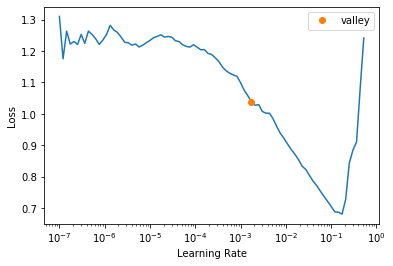

In [21]:
# Define the model using cnn_learner
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])

# Find the optimal lr using lr_find()
learning_rate = learn.lr_find()

In [22]:
learn.fine_tune(10, base_lr=learning_rate.valley, freeze_epochs=3) 

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.953759,0.441092,0.814655,0.185345,00:10
1,0.688964,0.137369,0.961207,0.038793,00:10
2,0.522402,0.116916,0.967672,0.032328,00:10


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.235527,0.100933,0.982759,0.017241,00:12
1,0.166211,0.063583,0.991379,0.008621,00:12
2,0.115388,0.026353,0.995690,0.004310,00:12
3,0.087984,0.010809,0.995690,0.004310,00:12
4,0.067662,0.032057,0.995690,0.004310,00:12
5,0.054391,0.004366,1.000000,0.000000,00:12
6,0.043680,0.003722,1.000000,0.000000,00:12


KeyboardInterrupt: 

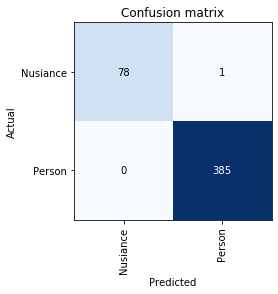

In [23]:
# create the interepreation object from our model
interep = ClassificationInterpretation.from_learner(learn)

# Plot the confusion matrix
interep.plot_confusion_matrix()

In [ ]:
# Export our trained model in form of pickle file
learn.export(fname='models/v1_person_classifier.pkl')

Truth: Nusiance


Nusiance
Nusiance prob TensorBase(1.)
Person prob TensorBase(2.5469e-13)


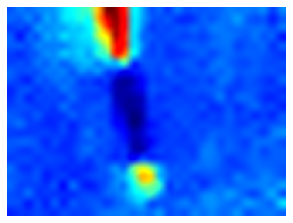

In [24]:
# load the model from pickle file 
load_inf = load_learner('models/v1_person_classifier.pkl')

# Perform some predictions from random images 
img1 = list(glob.glob(thermal_path+"/*"))[1]     
if img1.split('/')[-1].split('_')[1] == 'nusiance':
    print('Truth: Nusiance')
else:
    print('Truth: Person')
img = PILImage.create(img1)
img.show()
pred_class , _ , prediction = load_inf.predict(img)
print(pred_class)
print("Nusiance prob", prediction[0])
print("Person prob", prediction[1])

In [32]:
load_inf.show_results(max_n=3, figsize=(7,8))

ValueError: This DataLoader does not contain any batches

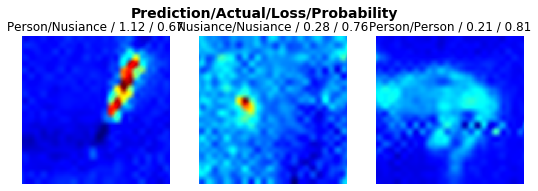

In [26]:
interp = SegmentationInterpretation.from_learner(learn)

# largest preds and losses.
interp.plot_top_losses(k=3) 

In [6]:
import time 
import glob
from fastai.vision.all import PILImage,load_learner
# Load the data path to images
path = os.getcwd()
thermal_path = os.path.join(path , 'img/thermal/')
# load the model from pickle file 
models =  glob.glob('models/*.pkl')

for model in models:
    load_inf = load_learner(model)

    # Perform some predictions from random images 
    img1 = list(glob.glob(thermal_path+"/*"))[10]     
    if img1.split('/')[-1].split('_')[1] == 'nusiance':
        print('Truth: Nusiance')
    else:
        print('Truth: Person')
    img = PILImage.create(img1)
    img.show()
    start = time.time()
    pred_class , _ , prediction = load_inf.predict(img)
    print("{} took {} seconds to predict".format(model,time.time()-start))
    print(pred_class)
    print("Nusiance prob", prediction[0])
    print("Person prob", prediction[1])

IsADirectoryError: [Errno 21] Is a directory: 'models'